In [1]:
from LRL import *

In [2]:
USE_CUDA

True

# Cartpole task

In [3]:
import gym
import gym.spaces        # to avoid warnings
gym.logger.set_level(40) # to avoid warnings

In [4]:
env = gym.make('CartPole-v0')

In [5]:
class CartpoleNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(4, 128),
                        nn.ReLU(),
                        linear(128, 128),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

# Store experiment results

In [6]:
import time
import pandas as pd
results = pd.DataFrame(columns=["Reached 200", "Average reward", "Wall clock per frame"])

In [7]:
def store_res(name, agent, walltime):
    perfect = np.nonzero(np.array(agent.rewards_log) == 200)[0]
    
    results.loc[name] = [perfect[0] if len(perfect) > 0 else None,
                         np.array(agent.rewards_log).mean(),
                         walltime / len(agent.loss_log)]

## Classic DQN

In [51]:
agent = eGreedy(TargetQAgent(QAgent(ReplayBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = Qnetwork, 
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500)

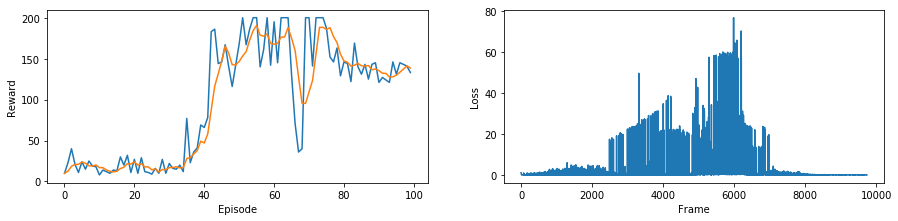

Complete in  124.28044939041138


In [52]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [53]:
store_res("DQN", agent, end - start)

## Double DQN

In [10]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = Qnetwork, 
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500)

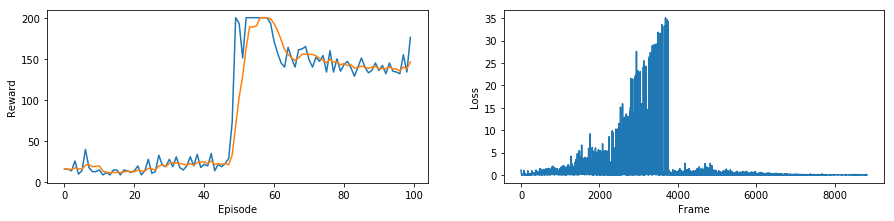

Complete in  124.02540278434753


In [11]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [12]:
store_res("Double DQN", agent, end - start)

## Dueling Double DQN

In [13]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = DuelingQnetwork, 
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500)

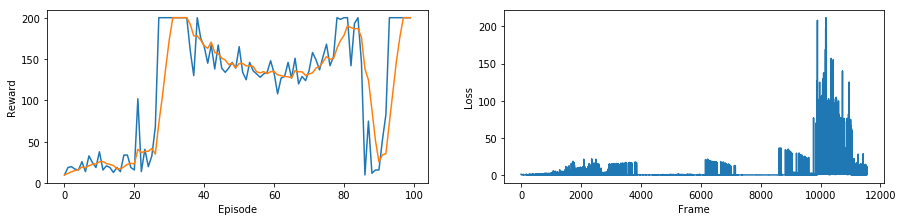

Complete in  222.2769889831543


In [14]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [15]:
store_res("Dueling Double DQN", agent, end - start)

## Double DQN + Prioritized

In [16]:
agent = eGreedy(DoubleQAgent(QAgent(PrioritizedBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = Qnetwork, 
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500)

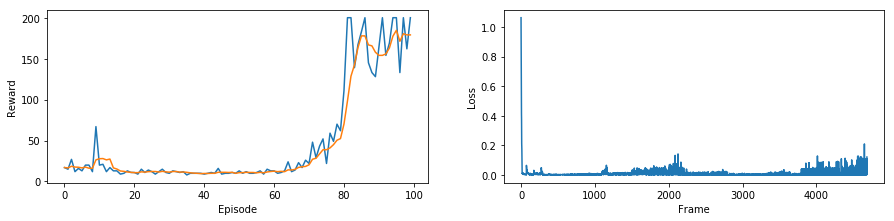

Complete in  74.52862167358398


In [17]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [18]:
store_res("Prioritized Double DQN", agent, end - start)

## Noisy Double DQN

In [19]:
agent = DoubleQAgent(QAgent(ReplayBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = Qnetwork,
                noisy=True,
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000)

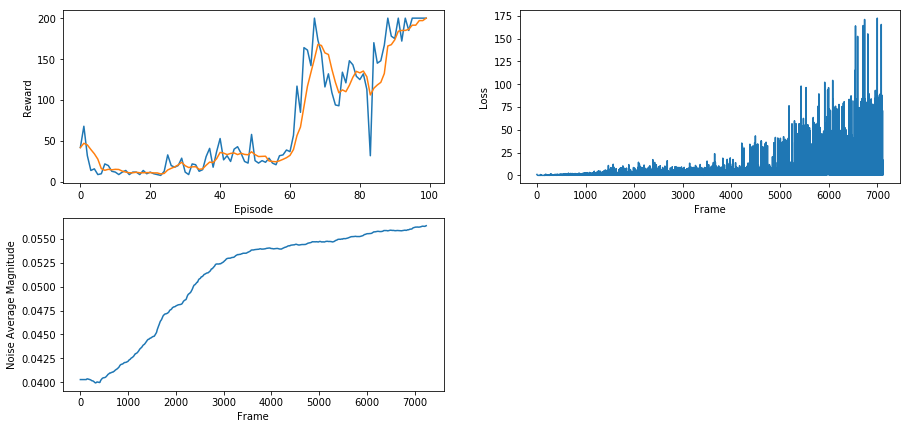

Complete in  234.6626946926117


In [20]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [21]:
store_res("Noisy Double DQN", agent, end - start)

## NoisyNet + Double DQN + Prioritized

In [22]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = Qnetwork,
                noisy = True,
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100)

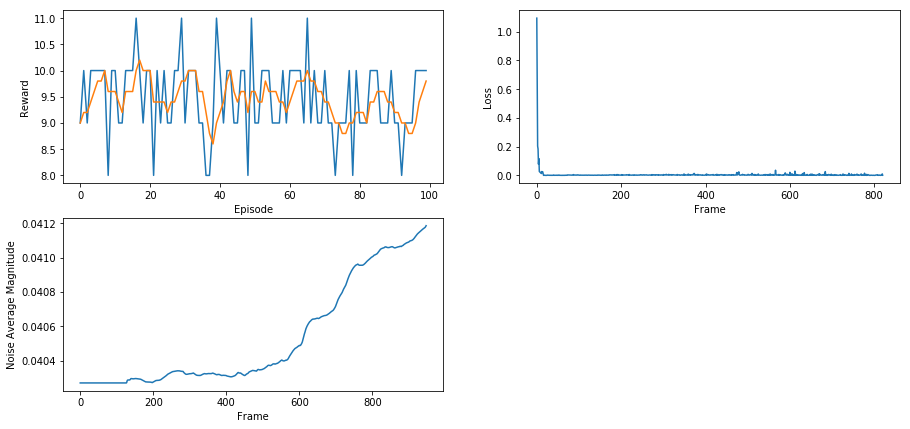

Complete in  50.07445740699768


In [23]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [24]:
store_res("Noisy Prioritized Double DQN", agent, end - start)

## Dueling + NoisyNet + Double DQN + Prioritized

In [25]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = DuelingQnetwork,
                noisy = True,
                target_update=100, 
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100)

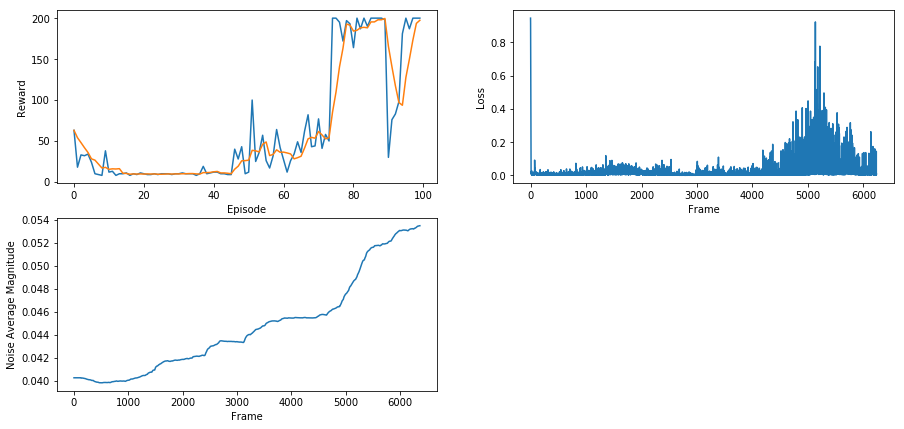

Complete in  246.16084957122803


In [26]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [27]:
store_res("Noisy Prioritized Dueling Double DQN", agent, end - start)

# Categorical

In [28]:
agent = eGreedy(CategoricalQAgent(ReplayBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = CategoricalQnetwork,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500,
                Vmin=-10, Vmax=10, num_atoms=51)

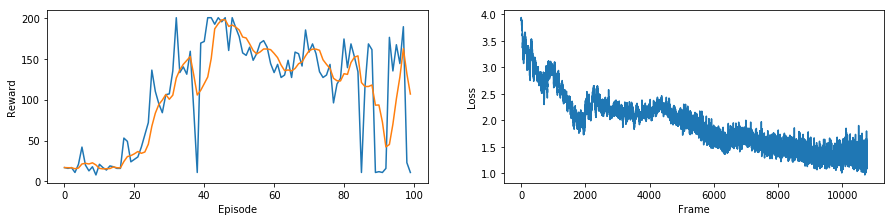

Complete in  186.97545051574707


In [29]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [30]:
store_res("Categorical DQN", agent, end - start)

# Categorical + Target

In [31]:
agent = eGreedy(TargetQAgent(CategoricalQAgent(ReplayBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = CategoricalQnetwork,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500,
                Vmin=-10, Vmax=10, num_atoms=51)

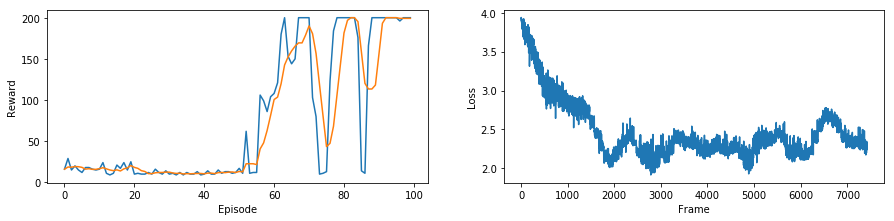

Complete in  131.87632083892822


In [32]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [33]:
store_res("Categorical DQN with target-net", agent, end - start)

# Categorical + Double

In [34]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(ReplayBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = CategoricalQnetwork,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500,
                Vmin=-10, Vmax=10, num_atoms=51)

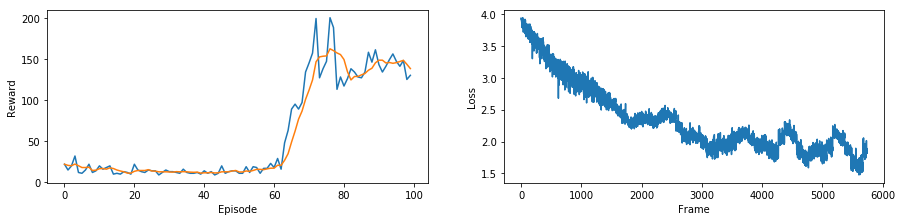

Complete in  112.20910406112671


In [35]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [36]:
store_res("Categorical Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer

In [37]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = CategoricalQnetwork,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                epsilon_start = 1.0, epsilon_final = 0.01, epsilon_decay = 500,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100,
                Vmin=-10, Vmax=10, num_atoms=51)

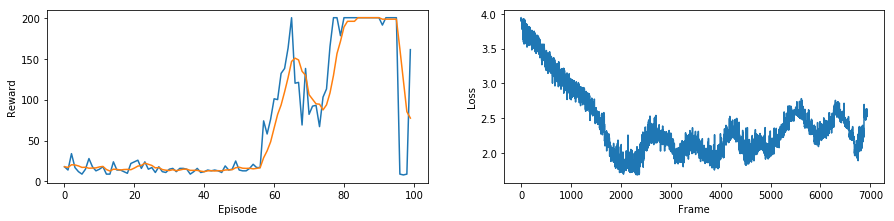

Complete in  132.4287052154541


In [38]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [39]:
store_res("Categorical Prioritized Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer + Noisy

In [40]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = CategoricalQnetwork,
                noisy = True,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100,
                Vmin=-10, Vmax=10, num_atoms=51)

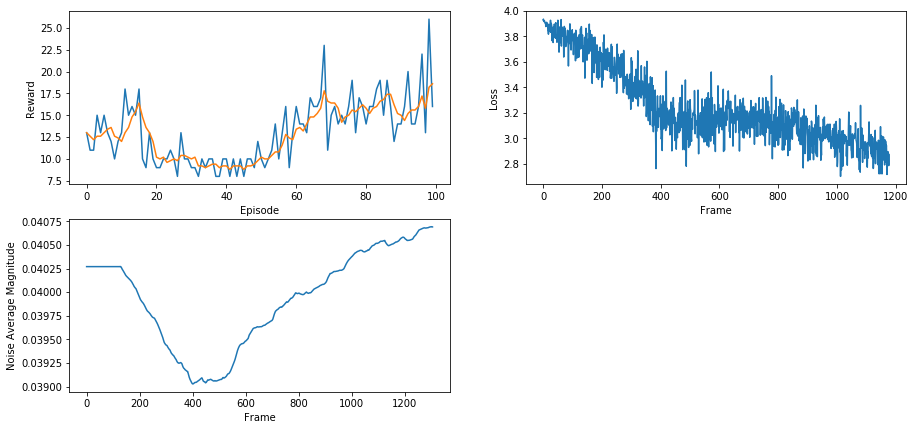

Complete in  67.66817569732666


In [41]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [42]:
store_res("Noisy Categorical Prioritized Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer + Noisy + Dueling

In [43]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = DuelingCategoricalQnetwork,
                noisy = True,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100,
                Vmin=-10, Vmax=10, num_atoms=51)

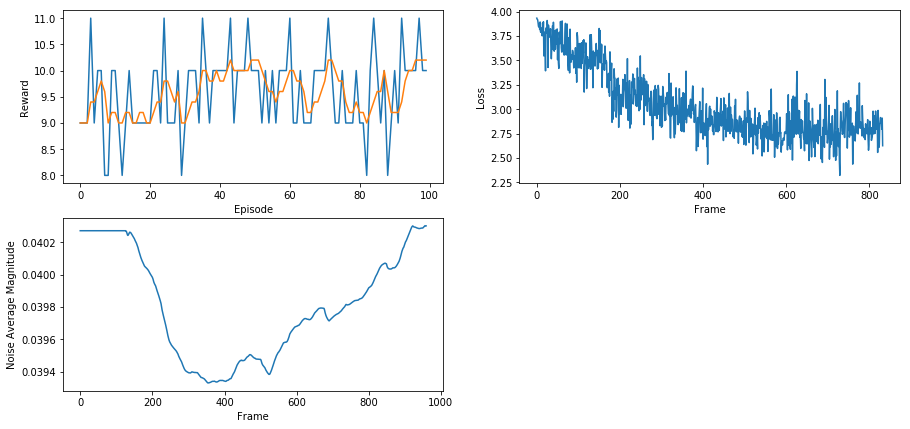

Complete in  59.982666015625


In [44]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [45]:
store_res("Noisy Categorical Prioritized Dueling Double DQN", agent, end - start)

# Rainbow

In [46]:
agent = DoubleQAgent(CategoricalQAgent(NstepReplay(PrioritizedBufferAgent)))(env=env,
                FeatureExtractorNet = CartpoleNN, 
                features_size = 128, 
                QnetworkHead = DuelingCategoricalQnetwork,
                noisy = True,
                target_update = 100,
                batch_size=32, 
                gamma=0.99,
                replay_buffer_nsteps = 2,
                replay_buffer_init=128,
                replay_buffer_capacity=1000,
                rp_alpha=0.6, rp_beta_start = 0.4, rp_beta_frames = 100,
                Vmin=-10, Vmax=10, num_atoms=51)

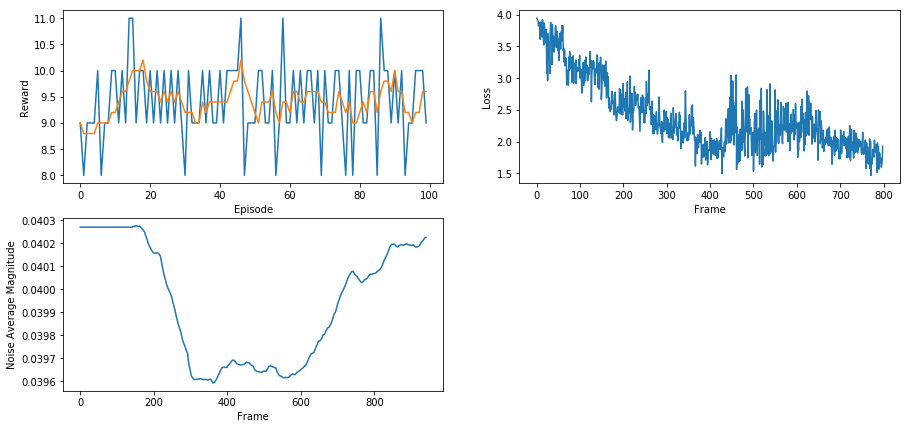

Complete in  59.11381983757019


In [47]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [48]:
store_res("Rainbow", agent, end - start)

# RESULTS

In [54]:
results

,Reached 200,Average reward,Wall clock per frame
Double DQN,49.0,89.50,0.014057
Dueling Double DQN,27.0,116.77,0.019245
Prioritized Double DQN,81.0,48.12,0.015908
Noisy Double DQN,67.0,72.41,0.032986
Noisy Prioritized Double DQN,NaN,9.48,0.060992
Noisy Prioritized Dueling Double DQN,74.0,63.62,0.039480
Categorical DQN,32.0,108.94,0.017366
Categorical DQN with target-net,63.0,75.49,0.017768
Categorical Double DQN,76.0,58.68,0.019545
Categorical Prioritized Double DQN,65.0,70.59,0.019104


In [55]:
env.close()